In [20]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
# import dataset
from keras.datasets import mnist
# Importing Keras layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
from keras.callbacks import EarlyStopping

In [21]:
# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))





Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


## Data Visualization

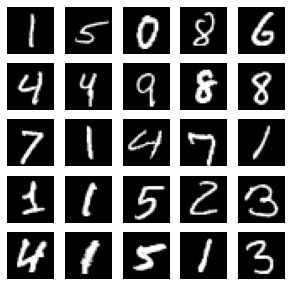

In [22]:
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

# Data Preparation 
Now, the data must be in the correct shape and format.
At this point, the labels are in digits format, 0 to 9.

This sparse scalar representation of labels is not suitable for the neural network prediction layer that outputs probabilities per class.

A more suitable format is called a one-hot vector, a 10-dim vector with all elements 0, except for the index of the digit class.

For example, if the label is 2, the equivalent one-hot vector is [0,0,1,0,0,0,0,0,0,0]. The first label has index 0.

In [23]:
# compute the number of labels
num_labels = len(np.unique(y_train))
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# Data Preprocessing 
 * In deep learning, data is stored in tensors. The term tensor applies to a scalar (0D tensor), vector (1D tensor), matrix (2D tensor), and a multi-dimensional tensor.

 * The rest code computes the image dimensions, input_size of the first Dense layer and scales each pixel value from 0 to 255 to range from 0.0 to 1.0. Although raw pixel values can be used directly, it is better to normalize the input data as to avoid large gradient values that could make training difficult.

 * The output of the network is also normalized. After training, there is an option to put everything back to the integer pixel values by multiplying the output tensor by 255.

 * The proposed model is based on MLP layers. Therefore, the input is expected to be a 1D tensor. So, x_train and x_test are reshaped to [60000, 28 28] and [10000, 28 28], respectively.

In [24]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size


784

In [25]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

# Designing the model architecture

The next step is to design the model architecture. The proposed model is made of three MLP layers.

In Keras, an MLP layer is referred to as Dense, which stands for the densely connected layer.

Both the first and second MLP layers are identical in nature with 256 units each, followed by relu activation and dropout.

In [26]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.2 
""" the Dropout layer randomly removes the fraction of units from participating in the next layer. 
For example, if the first layer has 256 units, after dropout=0.2 is applied, 
only (1 - 0.2) * 256 units = 204  units from layer 1 participate in layer 2."""
model = Sequential()
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

# view model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 10)               

The implementation of MLP model in Keras comprises of three steps:-

  * Compiling the model with the compile() method.
  * Training the model with fit() method.
  * Evaluating the model performance with evaluate() method.

In [29]:

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
es = keras.callbacks.EarlyStopping(
        monitor="val_acc", # metrics to monitor
        patience=10, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, # 
     )
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 6s 10ms/step - loss: 0.3098 - accuracy: 0.9073
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1261 - accuracy: 0.9618
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0919 - accuracy: 0.9714
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0722 - accuracy: 0.9775
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0622 - accuracy: 0.9810
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0512 - accuracy: 0.9834
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0466 - accuracy: 0.9852
Epoch 8/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0404 - accuracy: 0.9866
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0356 - accuracy: 0.9879
Epoch 10/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0346 - accuracy: 0.987

In [19]:
# Evaluate the model 
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 4ms/step - loss: 0.0907 - accuracy: 0.9846

Test accuracy: 98.5%
